<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [41]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
import re
from transformers import pipeline
import emoji
    
from src.data_module import read_processed_df

In [42]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/phuongnam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/phuongnam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

# Load dataframes that need to be used

In [44]:
channels_df = read_processed_df.read_channel_df()
channels_df

channel_name  video_count  subscriber_count  view_count  \
0                DeepLearningAI          319            272000    11306319   
1                   3Blue1Brown          155           5760000   420677024   
2                     Joma Tech           95           2270000   178760989   
3                      DataCamp          437            155000    12866441   
4                       CS Dojo           95           1920000    76016992   
5                       sentdex          501           1280000    60203871   
6   StatQuest with Josh Starmer          263           1060000    56419479   
7                 Tech With Tim          464           1400000    76914763   
8              365 Data Science          222            304000    13610599   
9                Data Professor          286            172000     5077282   
10            Data Science Dojo          378            102000     4977716   
11                   codebasics          487            914000    48507739   
12            Two Minute Papers          439           1510000   100673697   
13                    TheAiGrid          156            138000    17986894   
14                      AI News          383             69900     4499054   
15              Abhishek Thakur          149            108000     2705122   
16               IBM Technology          496            615000    21256742   
17                   PRO ROBOTS          147            331000    14678684   

      like_count  comment_count                        join_date  \
0   1.309760e+05         4322.0        2017-08-22 22:27:58+00:00   
1   1.179118e+07       377602.0        2015-03-03 23:11:55+00:00   
2   6.481158e+06       202994.0        2016-08-31 22:22:07+00:00   
3   1.738000e+04          680.0        2014-03-25 14:48:01+00:00   
4   1.879873e+06        82131.0        2016-02-26 01:49:30+00:00   
5   8.476530e+05        76757.0        2012-12-16 20:49:11+00:00   
6   1.244841e+06        85855.0        2011-05-24 01:52:48+00:00   
7   2.185506e+06        78572.0        2014-04-23 01:57:10+00:00   
8   2.697610e+05         7674.0        2017-08-07 15:17:05+00:00   
9   1.277980e+05        12465.0        2019-08-17 15:59:56+00:00   
10  7.418447e+04         3839.0        2014-08-06 21:12:46+00:00   
11  1.135114e+06        55731.0        2015-11-07 17:29:46+00:00   
12  4.184095e+06       202128.0        2006-08-18 00:05:41+00:00   
13  2.489730e+05        34340.0 2023-01-18 05:19:13.914691+00:00   
14  8.194800e+04         8410.0 2022-02-28 03:10:31.061038+00:00   
15  7.689595e+04         6200.0        2009-05-24 11:41:32+00:00   
16  5.231370e+05        13623.0        2008-05-27 21:31:11+00:00   
17  2.526870e+05        12737.0 2020-04-04 20:49:24.716956+00:00   

           country  \
0    Not available   
1    United States   
2    United States   
3    United States   
4           Canada   
5    United States   
6    United States   
7           Canada   
8         Bulgaria   
9         Thailand   
10   United States   
11   United States   
12         Hungary   
13  United Kingdom   
14   United States   
15          Norway   
16   United States   
17   United States   

                                                                                            description  \
0   Welcome to the official DeepLearning.AI YouTube channel! Here you can find the videos from our C...   
1   My name is Grant Sanderson. Videos here cover a variety of topics in math, or adjacent fields li...   
2   I talk about life in Silicon Valley and at big tech companies.\n\nFollow me on:\nInstagram: http...   
3   Welcome to DataCamp's official YouTube channel, your premier resource for data science and AI le...   
4   Hello! My name is YK, and I usually make videos about programming and computer science here :)\n...   
5   Python Programming tutorials, going further than just the basics. Learn about machine learning, ...   
6   Statistics, Machine Learning and Data Science can sometimes seem like v

In [45]:
videos_df = read_processed_df.read_video_df()
videos_df.head()

video_id  \
0  hh6gE0LxfO8   
1  _i3aqgKVNQI   
2  uvTL1N02f04   
3  H4YK_7MAckk   
4  YVtP5UGdgXg   

                                                                                       title  \
0                            #5 Machine Learning Specialization [Course 1, Week 1, Lesson 2]   
1                                                                       C5W3L01 Basic Models   
2                           #23 Machine Learning Specialization [Course 1, Week 2, Lesson 1]   
3  ChatGPT Prompt Engineering for Developers: A short course from OpenAI and DeepLearning.AI   
4                           #25 Machine Learning Specialization [Course 1, Week 2, Lesson 2]   

                  published  view_count  like_count  comment_count  \
0 2022-12-01 13:21:30+00:00       30742       319.0            6.0   
1 2018-02-05 19:50:14+00:00      110835       436.0           12.0   
2 2022-12-01 13:22:38+00:00       11639       107.0            4.0   
3 2023-04-27 14:49:09+00:00      143057      2847.0          121.0   
4 2022-12-01 13:22:45+00:00       11542       106.0            1.0   

         duration definition  \
0 0 days 00:07:17         hd   
1 0 days 00:06:19         hd   
2 0 days 00:06:53         hd   
3 0 days 00:01:58         hd   
4 0 days 00:06:35         hd   

                                                                                                  tags  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                  NaN   
3  [ChatGPT, prompt engineering, openai, deeplearning.ai, andrew ng, llms, large language models, o...   
4                                                                                                  NaN   

  default_audio_language  madeforkid    channelTitle  
0                     en       False  DeepLearningAI  
1                     en       False  DeepLearningAI  
2                     en       False  DeepLearningAI  
3                     en       False  DeepLearningAI  
4                     en       False  DeepLearningAI

In [46]:
comments_df = read_processed_df.read_comment_df()
comments_df.head()

author  Type     video_id  total_reply  like_count  \
0        @AiexpertRajivVerma   1.0  H_8ZVRRtiIA          0.0         0.0   
1              @hamasali8764   1.0  bZwkaVnhEo4          0.0         0.0   
2                     @R0H00   1.0  hkOosfWxBK4          0.0         1.0   
3  @nitinsnoisepollution6293   1.0  hkOosfWxBK4          0.0         0.0   
4                 @REDBONDYT   1.0  Fxq6vjJwX3o          0.0         1.0   

               published_at  \
0 2023-12-11 01:11:19+00:00   
1 2023-07-27 16:54:52+00:00   
2 2023-11-18 02:51:01+00:00   
3 2023-11-17 20:39:13+00:00   
4 2023-07-30 12:36:13+00:00   

                                                                                           textdisplay  \
0  Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for free these courses as I belong from India but don&#...   
1                                                                                            Best One🎉   
2  Hi, I&#39;m a clinician who is working in the digital health/ informatics space. Can you please ...   
3                                                                                            Superb 🎉❤   
4                                                                                  Very informative 😃😺   

                  updatedat  
0 2023-12-11 01:11:19+00:00  
1 2023-07-27 16:54:52+00:00  
2 2023-11-18 02:51:01+00:00  
3 2023-11-17 20:39:13+00:00  
4 2023-07-30 12:36:13+00:00

# Overview about all channels

## Introduction to the channels being analyzed

In our project, we will analyze 18 channels, all of which have been selected by our team members, primarily based on their personal preferences.

We have chosen numerous popular channels with a long history and a familiar presence in broadcasting. Additionally, we have selected some new channels with promising content poised for future development

In [47]:
def convert_to_KMB_format(number):
    if number >= 1000000000:
        return str(round(number/1000000000, 1)) + 'B'
    elif number >= 1000000:
        return str(round(number/1000000, 1)) + 'M'
    elif number >= 1000:
        return str(round(number/1000, 1)) + 'K'
    else:
        return str(number)

In [48]:
def preprocess_description(description):
    # Remove special characters and extra whitespaces
    description = re.sub(r'[^\w\s]', '', description)
    description = re.sub(r'\s+', ' ', description)
    return description.strip()

temp_df = channels_df[['channel_name', 'join_date', 'subscriber_count', 'description']].sort_values(by='join_date', ascending=True)
temp_df['join_date'] = temp_df['join_date'].dt.date
# Sort the dataframe by the join date
temp_df = temp_df.sort_values(by='join_date', ascending=True).reset_index(drop=True)
# Display full description
# Replace the subscriber count with the K/M/B format
temp_df['subscriber_count'] = temp_df['subscriber_count'].apply(convert_to_KMB_format)

for i in range(len(temp_df)):
    print(f"Channel Name: {temp_df['channel_name'][i]}  \n\tJoin Date:        {temp_df['join_date'][i]}  \n\tSubscriber Count: {temp_df['subscriber_count'][i]}  \n\tDescription:      {preprocess_description(temp_df['description'][i])}\n")

Channel Name: Two Minute Papers  
	Join Date:        2006-08-18  
	Subscriber Count: 1.5M  
	Description:      What a time to be alive

Channel Name: IBM Technology  
	Join Date:        2008-05-27  
	Subscriber Count: 615.0K  
	Description:      Whether its AI automation cybersecurity data science DevOps quantum computing or anything in between we provide educational content on the biggest topics in tech Subscribe to build your skillset learn about new trends and gain insights from IBM experts This channel follows the IBM Social Computing Guidelines

Channel Name: Abhishek Thakur  
	Join Date:        2009-05-24  
	Subscriber Count: 108.0K  
	Description:      I make videos about applied machine learning deep learning and data science I am the worlds first Quadruple Grand Master on Kaggle My codeintensive book Approaching Almost Any Machine Learning Problem can be downloaded for free from httpsbitlyapproachingml If you like it you can also buy paperback copies Feel free to contact me fo

## Does the number of subscribers determine the popularity of a channel?

<a id='another_cell'></a>We will create four bar charts representing the number of subscribers, views, likes, and comments, arranged in descending order of the number of subscribers.

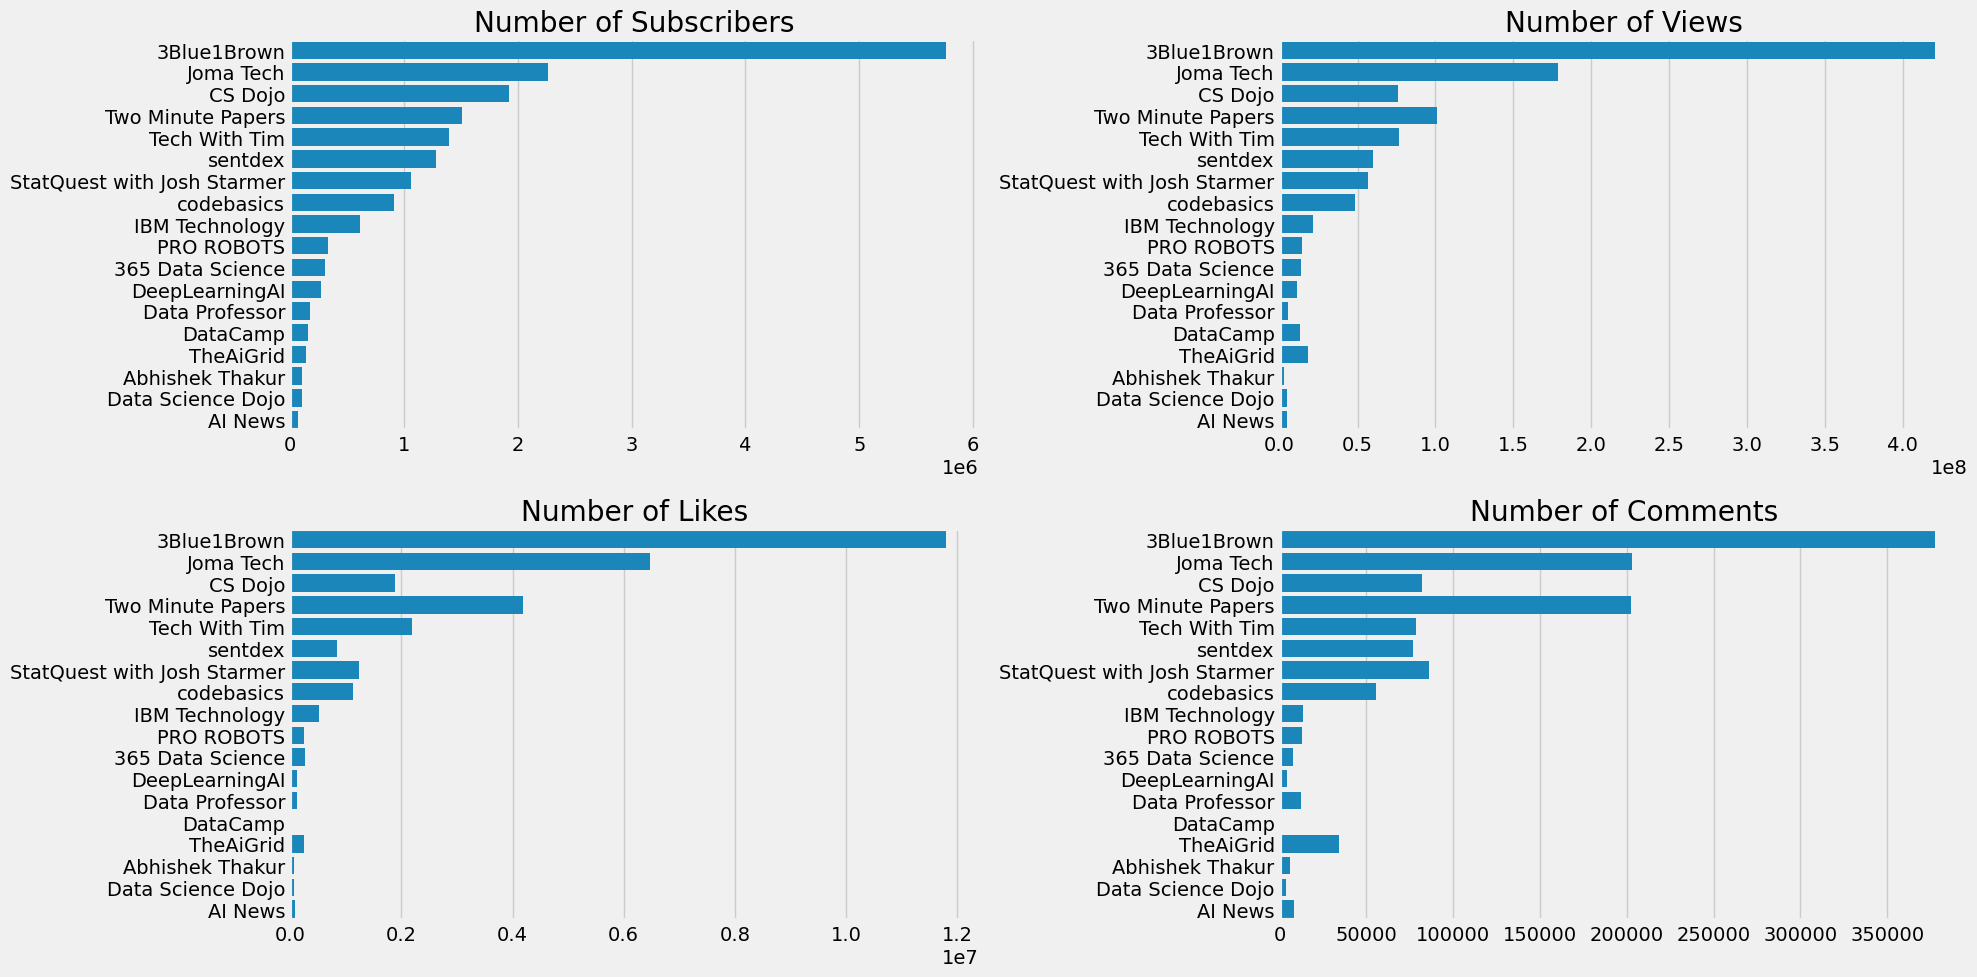

In [49]:
temp_df = channels_df.sort_values(by=['subscriber_count'], ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()
# Plot number of subscribers
sns.barplot(x='subscriber_count', y='channel_name', data=temp_df, ax=axes[0])
axes[0].set_title('Number of Subscribers')

# Plot number of views
sns.barplot(x='view_count', y='channel_name', data=temp_df, ax=axes[1])
axes[1].set_title('Number of Views')

# Plot number of likes
sns.barplot(x='like_count', y='channel_name', data=temp_df, ax=axes[2])
axes[2].set_title('Number of Likes')

# Plot number of comments
sns.barplot(x='comment_count', y='channel_name', data=temp_df, ax=axes[3])
axes[3].set_title('Number of Comments')

# Remove labels
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show()

Obviously, the number of subscribers isn't the only factor that determines the popularity of a channel. Typically `CS Dojo` has so many subscribers but it doesn't perform well in other metrics. On the other side, `TheAiGrid` doesn't have many subscribers but its views, likes, even comments are quite high.

## How are these channels viewed?

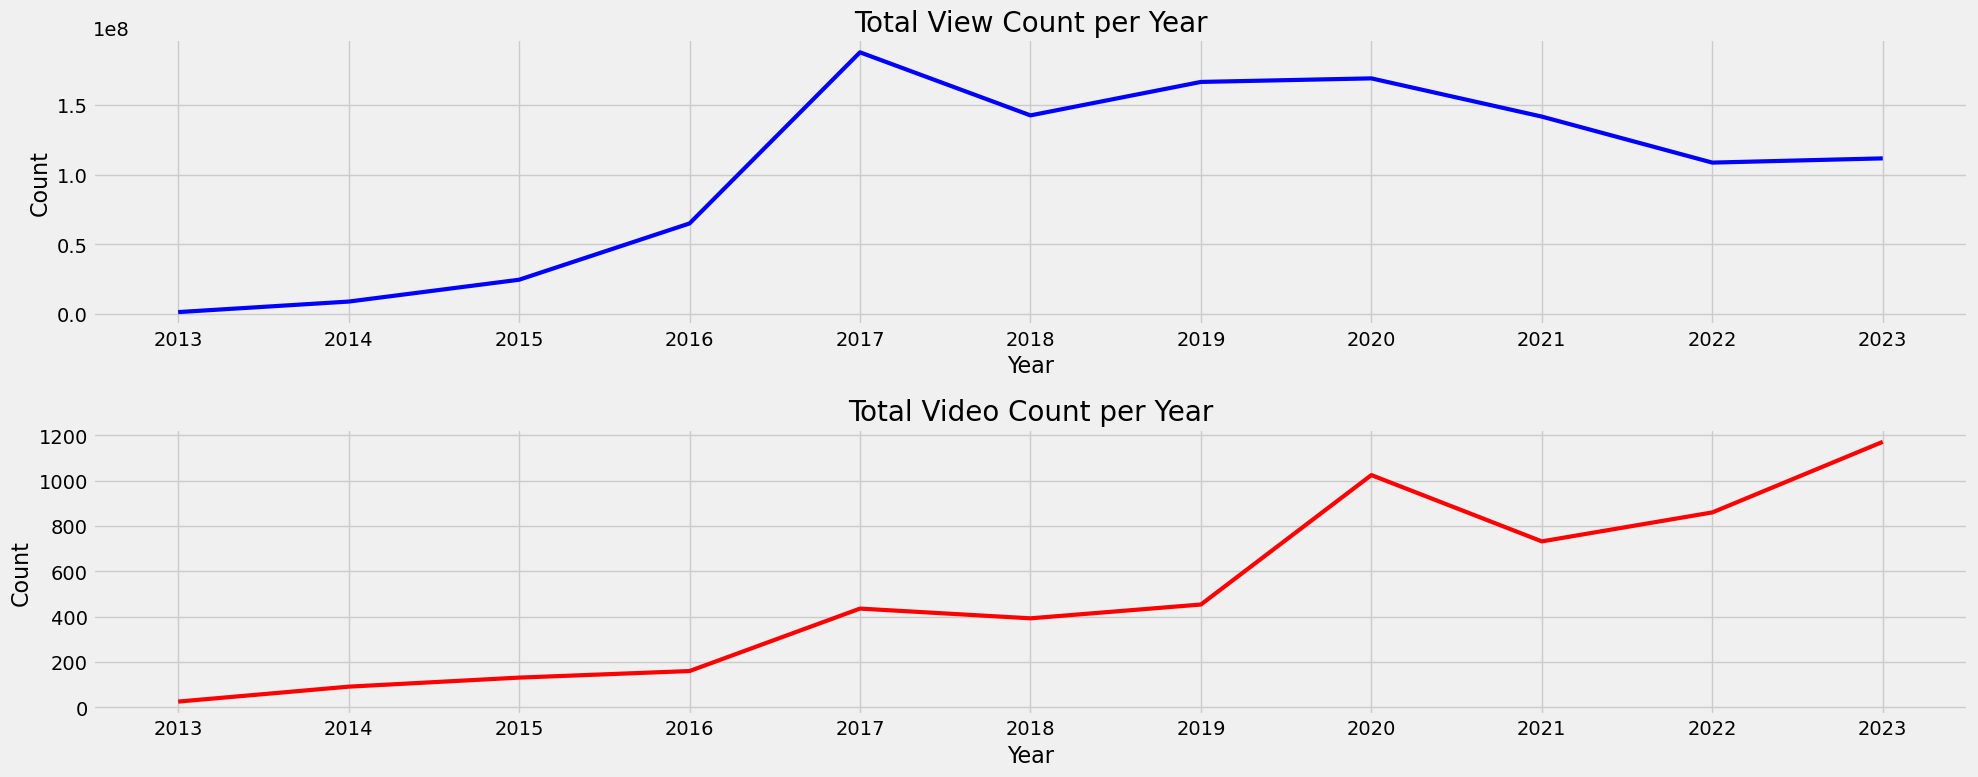

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Plot for view count per year
temp_df = videos_df.groupby([videos_df['published'].dt.year])['view_count'].sum()
ax1.plot(temp_df.index, temp_df.values, linewidth=3, color='blue')
ax1.set_title('Total View Count per Year', fontsize=20)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_xticks(temp_df.index)
ax1.grid(True)

# Plot for video count per year
temp_df = videos_df.groupby([videos_df['published'].dt.year])['video_id'].count()
ax2.plot(temp_df.index, temp_df.values, linewidth=3, color='red')
ax2.set_title('Total Video Count per Year', fontsize=20)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.set_xticks(temp_df.index)
ax2.grid(True)

plt.tight_layout()
plt.show()

While creators continue to produce more videos, the number of views has recently shown a decreasing trend, reaching its peak only in 2017, despite the fact that this year do not have a lot of videos. In contrast, 2020 and 2023 have seen an increase in the number of videos, but the number of views is decreasing compared to previous years.

In [51]:
temp_df = videos_df.groupby(['channelTitle', videos_df['published'].dt.year])[
    'view_count'].sum().unstack()
# Short add the year join to sort then remove it
temp_df = temp_df.join(channels_df.set_index('channel_name')[
                       'join_date'].dt.year).sort_values(by='join_date').drop('join_date', axis=1)

# Replace the view counts with the K/M/B format
temp_df = temp_df.apply(lambda x: x.apply(
    lambda 
        y: f'{y/1e9:.1f}B' if y >= 1e9 
                            else f'{y/1e6:.1f}M' 
                                if y >= 1e6 
                                else  f'{y/1e3:.1f}K' if y > 0 else 0))

temp_df

2013    2014   2015    2016    2017    2018  \
channelTitle                                                               
Two Minute Papers               0       0   1.9M  385.0K    1.3M    2.2M   
IBM Technology                  0       0  48.5K       0  117.3K  419.1K   
Abhishek Thakur                 0       0      0       0       0       0   
StatQuest with Josh Starmer     0   27.8K   2.3M  861.1K   11.1M   18.8M   
sentdex                      1.2M    8.6M  10.4M    5.4M    8.7M    8.0M   
Tech With Tim                   0       0      0       0  377.1K    1.4M   
Data Science Dojo               0  135.5K      0  230.7K    3.0M  413.4K   
DataCamp                        0       0   2.0K   67.2K   10.2K    0.4K   
3Blue1Brown                     0       0   9.7M   54.7M  116.6M   45.2M   
codebasics                      0       0  80.2K    1.5M    4.7M    4.0M   
CS Dojo                         0       0      0    1.7M   28.5M   40.0M   
Joma Tech                       0       0      0       0    2.9M   19.9M   
365 Data Science                0       0      0       0    2.4M    1.8M   
DeepLearningAI                  0       0      0       0    8.0M  480.6K   
Data Professor                  0       0      0       0       0       0   
PRO ROBOTS                      0       0      0       0       0       0   
AI News                         0       0      0       0       0       0   
TheAiGrid                       0       0      0       0       0       0   

                               2019    2020    2021    2022    2023  
channelTitle                                                         
Two Minute Papers             23.1M   22.9M   21.8M   19.3M    7.7M  
IBM Technology                 4.4M    3.3M    4.3M    4.3M    4.4M  
Abhishek Thakur              103.5K    1.4M  670.2K  142.5K  403.6K  
StatQuest with Josh Starmer    9.9M    7.0M    3.0M    2.2M    1.2M  
sentdex                        7.5M    3.7M    2.2M    3.4M    1.0M  
Tech With Tim                 22.9M   19.7M   18.4M    7.3M    6.9M  
Data Science Dojo            834.7K   27.5K   59.0K  163.1K   90.1K  
DataCamp                       3.3M    2.4M    7.0M   97.5K   25.0K  
3Blue1Brown                   63.3M   37.0M   11.4M   26.4M   56.4M  
codebasics                     3.1M   16.6M    9.9M    5.6M    3.1M  
CS Dojo                        2.9M    1.7M  924.2K  277.7K       0  
Joma Tech                     19.5M   47.4M   59.8M   25.7M    3.6M  
365 Data Science               5.2M    3.1M  533.0K  434.2K  159.1K  
DeepLearningAI               116.6K  350.8K  449.5K    1.3M  621.2K  
Data Professor               392.1K    2.6M    1.1M  659.2K  263.7K  
PRO ROBOTS                        0    7.2K   34.9K   10.0M    4.7M  
AI News                           0       0       0    1.5M    3.0M  
TheAiGrid                         0       0       0       0   18.0M

Two channels, 'Two Minute Papers' and '3Blue1Brown,' consistently maintain a significantly large number of views over the years. This is attributed to the creators' adept understanding of how to captivate viewers through compelling topics and present them in the simplest and most understandable way.

Mostly other channels have a similar trend, with a few years of high views then a sharp decline. 

Some channels such as `PRO ROBOTS`, `AI News`, and `TheAiGrid` have achieved a substantial number of views in 2023 despite being recently established. This indicates promising content for the future.

Notably, the channel `CS Dojo` recorded zero views in 2023, suggesting a potential halt in video production. Nevertheless, the older videos from this channel still hold significant value for viewers.

## What is the most interesting channel?

In this section, we will not evaluate based on the number of likes or comments. This is due to the obvious fact that more popular channels will naturally have more likes and comments. In my opinion, popularity doesn't necessarily equate to interest. Instead, we will assess using the ratio of likes and comments to views.

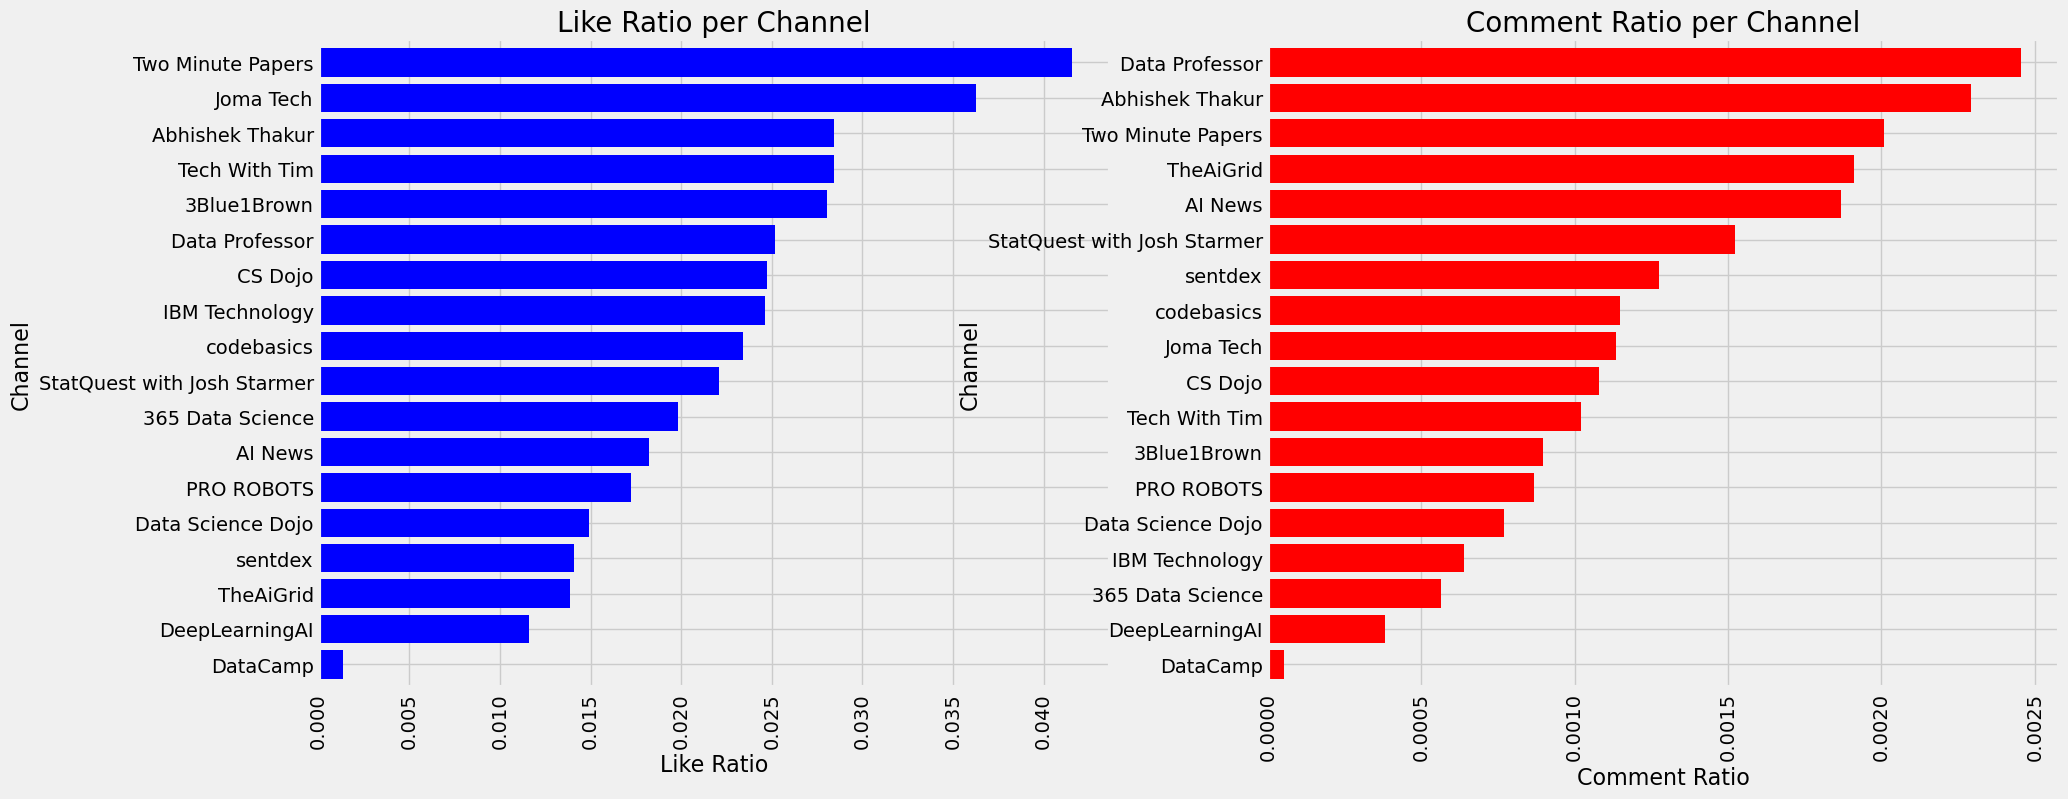

In [52]:
temp_df = videos_df.groupby(['channelTitle'])[['view_count', 'like_count', 'comment_count']].sum()
temp_df['like_ratio'] = temp_df['like_count'] / temp_df['view_count']
temp_df['comment_ratio'] = temp_df['comment_count'] / temp_df['view_count']

# Plot the like ratio and comment ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
temp_df.sort_values(by='like_ratio')['like_ratio'].plot(
    kind='barh', ax=ax1, color='blue', width=0.8)
ax1.set_title('Like Ratio per Channel', fontsize=20)
ax1.set_ylabel('Channel', fontsize=16)
ax1.set_xlabel('Like Ratio', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

temp_df.sort_values(by='comment_ratio')['comment_ratio'].plot(
    kind='barh', ax=ax2, color='red', width=0.8)
ax2.set_title('Comment Ratio per Channel', fontsize=20)
ax2.set_ylabel('Channel', fontsize=16)
ax2.set_xlabel('Comment Ratio', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

As we expected, `Two Minute Papers` has very high ratios of likes and comments to views. This channel showcase and attempt to explain interesting research works. With only couple minutes of each video, viewers can quickly grasp the main idea of some new reseach works. This makes each video has a high ratio of interaction and follow channel in a long time.

`Abhishek Thakur`, `TheAiGrid`, `AI News`, `Data Professor` all are new channels but they still stand in the top. This is a good sign for the future of these channels with promising content.

`Joma Tech`, `Tech With Tim`, `3Blue1Brown` are prominent channels, each with its own standing and widespread familiarity among viewers in the field of technology.

`Abhishek Thakur` has an exceptionally high ratio of likes and comments to views, particularly in the comments section. The channel is named after its creator, who holds the prestigious title of the world's first Quadruple Grand Master on Kaggle. His videos primarily focus on coding interesting projects, models, and utilizing new libraries, making them engaging topics for discussion and commentary.

Surprisingly, `Data Professor` is among the channels with the highest ratio of likes and comments to views. This channel is managed by an Associate Professor of Bioinformatics at a Research University. The majority of the videos focus on teaching new and interesting tools for data science, garnering numerous positive comments for each video.

# Overview about all videos

## The timeframe for video publishing

In [53]:
videos_df = read_processed_df.read_video_df()
videos_df.head()

video_id  \
0  hh6gE0LxfO8   
1  _i3aqgKVNQI   
2  uvTL1N02f04   
3  H4YK_7MAckk   
4  YVtP5UGdgXg   

                                                                                       title  \
0                            #5 Machine Learning Specialization [Course 1, Week 1, Lesson 2]   
1                                                                       C5W3L01 Basic Models   
2                           #23 Machine Learning Specialization [Course 1, Week 2, Lesson 1]   
3  ChatGPT Prompt Engineering for Developers: A short course from OpenAI and DeepLearning.AI   
4                           #25 Machine Learning Specialization [Course 1, Week 2, Lesson 2]   

                  published  view_count  like_count  comment_count  \
0 2022-12-01 13:21:30+00:00       30742       319.0            6.0   
1 2018-02-05 19:50:14+00:00      110835       436.0           12.0   
2 2022-12-01 13:22:38+00:00       11639       107.0            4.0   
3 2023-04-27 14:49:09+00:00      143057      2847.0          121.0   
4 2022-12-01 13:22:45+00:00       11542       106.0            1.0   

         duration definition  \
0 0 days 00:07:17         hd   
1 0 days 00:06:19         hd   
2 0 days 00:06:53         hd   
3 0 days 00:01:58         hd   
4 0 days 00:06:35         hd   

                                                                                                  tags  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                  NaN   
3  [ChatGPT, prompt engineering, openai, deeplearning.ai, andrew ng, llms, large language models, o...   
4                                                                                                  NaN   

  default_audio_language  madeforkid    channelTitle  
0                     en       False  DeepLearningAI  
1                     en       False  DeepLearningAI  
2                     en       False  DeepLearningAI  
3                     en       False  DeepLearningAI  
4                     en       False  DeepLearningAI

In [54]:
start = videos_df['published'].min().date()
end = videos_df['published'].max().date()
print(f"Videos published between {start} and {end}")

Videos published between 2013-06-14 and 2023-12-31


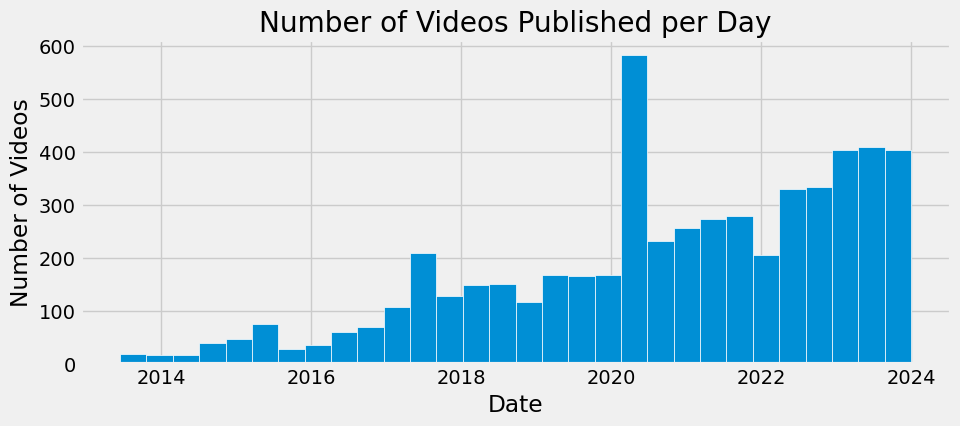

In [55]:
# Histogram of the number of videos published
plt.figure(figsize=(10, 4))
plt.hist(videos_df['published'], bins=30, edgecolor='white')
plt.title('Number of Videos Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.show()

Since 2020, there has been a significant surge in the number of published videos. This increase can be attributed to the COVID-19 pandemic, which compelled people to stay at home, leading to a notable rise in video production.

In 2023, a substantial number of videos were published, reflecting the inclusion of recently established channels in our team's collection.

### The common time for video publishing

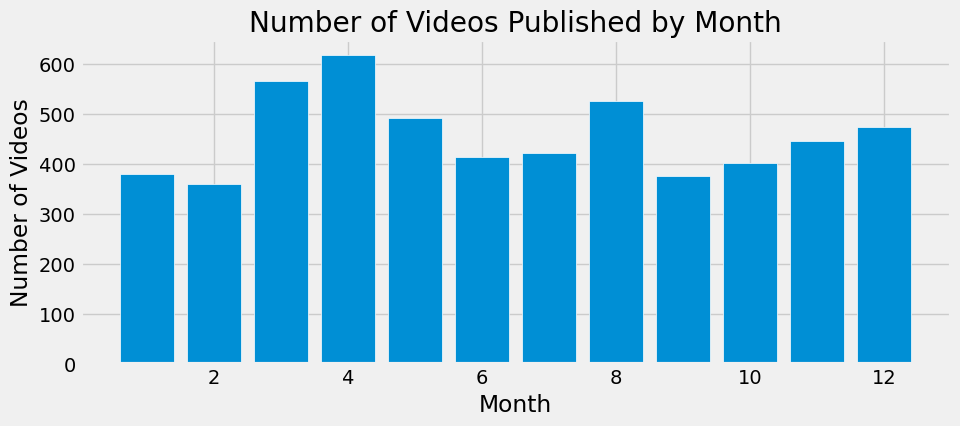

In [56]:
# Number of videos published by month
mont_count = videos_df.groupby(videos_df['published'].dt.month)['video_id'].nunique()

plt.figure(figsize=(10, 4))
plt.bar(mont_count.index, mont_count.values, edgecolor='white')
plt.title('Number of Videos Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.show()

Creators tend to publish videos on May, March and August.

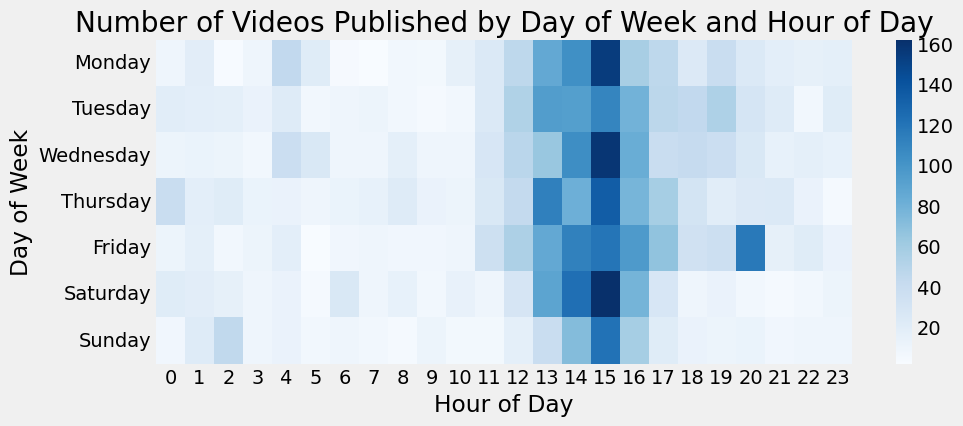

In [57]:
# Heatmap of the number of videos published by day of week and hour of day
temp_df = videos_df.copy()
temp_df['day_of_week'] = temp_df['published'].dt.strftime('%A')
temp_df['hour_of_day'] = temp_df['published'].dt.hour

# Sort the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp_df['day_of_week'] = pd.Categorical(temp_df['day_of_week'], categories=days_of_week, ordered=True)

plt.figure(figsize=(10, 4))
sns.heatmap(temp_df.groupby(['day_of_week', 'hour_of_day']).size().unstack(), cmap='Blues')
plt.title('Number of Videos Published by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

The majority of content creators choose to release their videos during the afternoon, with 3 PM emerging as the prevailing time. This preference could stem from creators' belief that audiences are more inclined to engage with videos during these later hours.

## Video durations

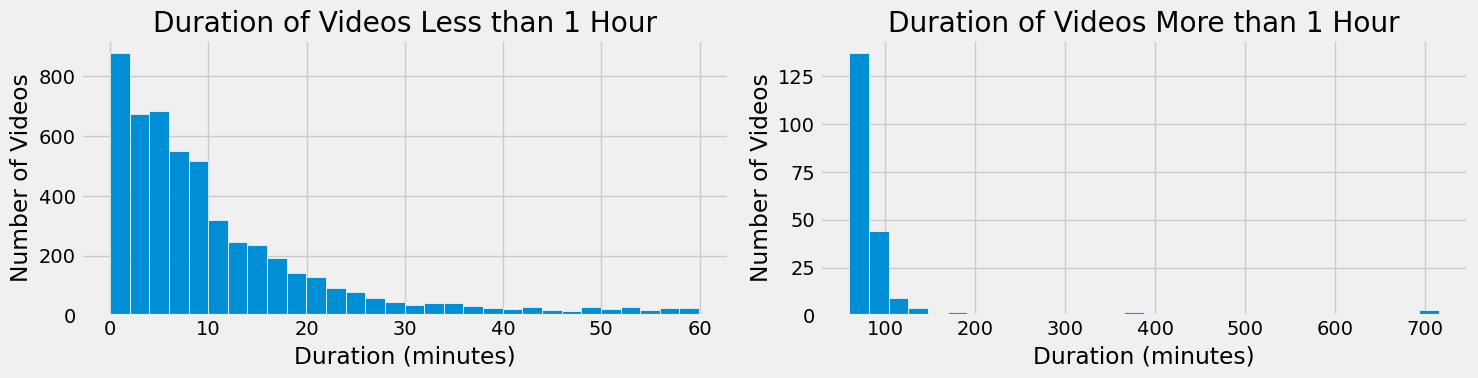

In [58]:
# Histogram of the duration of videos
# Separate the videos into 2 groups: less than 1 hour and more than 1 hour
temp_df = videos_df.copy()
temp_df['duration_minute'] = temp_df['duration'].dt.total_seconds()/60
temp_df['duration_group'] = np.where(temp_df['duration_minute'] < 60, 'Less than 1 hour', 'More than 1 hour')

# Plot 2 histograms for each group
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes = axes.flatten()

temp_df[temp_df['duration_group'] == 'Less than 1 hour']['duration_minute'].plot(
    kind='hist', bins=30, edgecolor='white', ax=axes[0])
axes[0].set_title('Duration of Videos Less than 1 Hour')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Number of Videos')

temp_df[temp_df['duration_group'] == 'More than 1 hour']['duration_minute'].plot(
    kind='hist', bins=30, edgecolor='white', ax=axes[1])
axes[1].set_title('Duration of Videos More than 1 Hour')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Number of Videos')

plt.tight_layout()  
plt.show()

In [59]:
# percentage of videos that are less than 10 minutes
temp_df[temp_df['duration_minute'] <= 10]['video_id'].count() / temp_df['video_id'].count() * 100

60.453216374269005

Sixty percent of the videos have a duration of 10 minutes or less, reflecting the trend of short videos. However, the question remains: does this imply that short videos are inherently good?

### Affecting of video duration to views, likes, comments

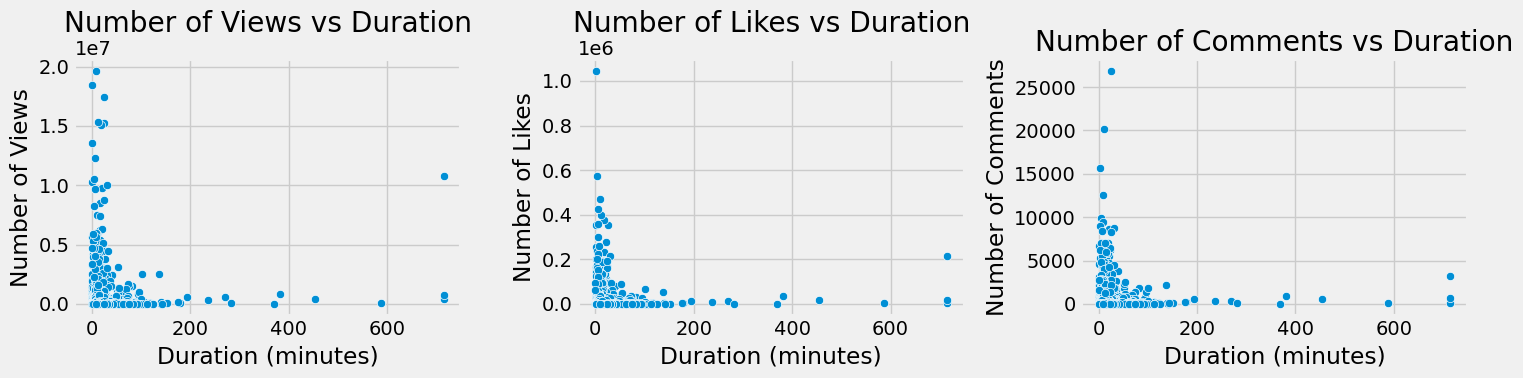

In [60]:
# Plot 3 scatter plots of the number of views, likes, and comments vs duration
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()

sns.scatterplot(x='duration_minute', y='view_count', data=temp_df, ax=axes[0])
axes[0].set_title('Number of Views vs Duration')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Number of Views')

sns.scatterplot(x='duration_minute', y='like_count', data=temp_df, ax=axes[1])
axes[1].set_title('Number of Likes vs Duration')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Number of Likes')

sns.scatterplot(x='duration_minute', y='comment_count', data=temp_df, ax=axes[2])
axes[2].set_title('Number of Comments vs Duration')
axes[2].set_xlabel('Duration (minutes)')
axes[2].set_ylabel('Number of Comments')

plt.tight_layout()
plt.show()


## The best videos

There are some videos with 0 views. We will remove them from the list.

In [61]:
temp_df = videos_df[videos_df['view_count'] > 0]
temp_df['like_ratio'] = temp_df['like_count'] / temp_df['view_count']
temp_df['comment_ratio'] = temp_df['comment_count'] / temp_df['view_count']

### Videos with the most likes

In [62]:
temp_df.sort_values(by='like_count', ascending=False).head(5)

video_id                                               title  \
319  P11ykXwx4-k                    I'm still astounded this is true   
479  pKO9UjSeLew                         If Programming Was An Anime   
496  Rgx8dpiPwpA  a day in the life of an engineer working from home   
485  sW9npZVpiMI                   why you NEED math for programming   
375  OkmNXy7er84             The hardest problem on the hardest test   

                    published  view_count  like_count  comment_count  \
319 2023-12-07 01:11:14+00:00    18435854   1043942.0         4660.0   
479 2020-02-24 14:00:07+00:00    10501201    572789.0        15632.0   
496 2021-05-23 06:15:41+00:00    19622082    469868.0        12569.0   
485 2021-01-06 01:05:51+00:00     8269146    427596.0         9952.0   
375 2017-12-08 15:04:57+00:00    15375077    399799.0        20199.0   

           duration definition  \
319 0 days 00:01:00         hd   
479 0 days 00:03:26         hd   
496 0 days 00:08:42         hd   
485 0 days 00:05:03         hd   
375 0 days 00:11:15         hd   

                                                                                                    tags  \
319  [Mathematics, three blue one brown, 3 blue 1 brown, 3b1b, 3brown1blue, 3 brown 1 blue, three bro...   
479  [joma, vlog, joma tech, programming, coding, leetcode, finding duplicate number, anime, programm...   
496  [joma, vlog, day in the life, software engineering, software engineer, day in the life of a soft...   
485                                                                                         [joma, vlog]   
375  [three brown one blue, putnam, math contest, geometry, 3 brown 1 blue, brown, 3b1b, blue, Mathem...   

    default_audio_language  madeforkid channelTitle  like_ratio  comment_ratio  
319                     en       False  3Blue1Brown    0.056626       0.000253  
479                     en       False    Joma Tech    0.054545       0.001489  
496                     en       False    Joma Tech    0.023946       0.000641  
485                     en       False    Joma Tech    0.051710       0.001204  
375                     en       False  3Blue1Brown    0.026003       0.001314

The top 5 all belong to `Joma Tech` and `3Blue1Brown,` which comes as no surprise. `3Blue1Brown` is a must-watch channel for anyone interested in mathematics, while `Joma Tech` is an entertaining channel with numerous amusing videos in the field of technology.

### Videos with the most comments

In [63]:
temp_df.sort_values(by='comment_count', ascending=False).head(5)

video_id                                               title  \
342  bBC-nXj3Ng4                 But how does bitcoin actually work?   
375  OkmNXy7er84             The hardest problem on the hardest test   
479  pKO9UjSeLew                         If Programming Was An Anime   
496  Rgx8dpiPwpA  a day in the life of an engineer working from home   
485  sW9npZVpiMI                   why you NEED math for programming   

                    published  view_count  like_count  comment_count  \
342 2017-07-07 16:51:37+00:00    15227660    352045.0        26833.0   
375 2017-12-08 15:04:57+00:00    15375077    399799.0        20199.0   
479 2020-02-24 14:00:07+00:00    10501201    572789.0        15632.0   
496 2021-05-23 06:15:41+00:00    19622082    469868.0        12569.0   
485 2021-01-06 01:05:51+00:00     8269146    427596.0         9952.0   

           duration definition  \
342 0 days 00:25:16         hd   
375 0 days 00:11:15         hd   
479 0 days 00:03:26         hd   
496 0 days 00:08:42         hd   
485 0 days 00:05:03         hd   

                                                                                                    tags  \
342  [three brown one blue, 3 blue 1 brown, three, blue, 3brown1blue, bitcoin, three blue one brown, ...   
375  [three brown one blue, putnam, math contest, geometry, 3 brown 1 blue, brown, 3b1b, blue, Mathem...   
479  [joma, vlog, joma tech, programming, coding, leetcode, finding duplicate number, anime, programm...   
496  [joma, vlog, day in the life, software engineering, software engineer, day in the life of a soft...   
485                                                                                         [joma, vlog]   

    default_audio_language  madeforkid channelTitle  like_ratio  comment_ratio  
342                     en       False  3Blue1Brown    0.023119       0.001762  
375                     en       False  3Blue1Brown    0.026003       0.001314  
479                     en       False    Joma Tech    0.054545       0.001489  
496                     en       False    Joma Tech    0.023946       0.000641  
485                     en       False    Joma Tech    0.051710       0.001204

The comment count serves as a reflection of the channel's popularity. The top 5 videos with the most comments still belong to `Joma Tech` and `3Blue1Brown`.

These videos are familiar for most of us. Now, let's take a look at the videos with the highest ratio of likes and comments to views.

### Videos with the highest ratio of likes

In [64]:
temp_df.sort_values(by='like_ratio', ascending=False).head(5)

video_id  \
5309  HoSzhXtBzbk   
3503  huWr4E88ZoI   
5107  m6sQQdGU3D4   
3444  wNbq6DxFcwU   
3307  otdiLsyzv90   

                                                                                                   title  \
5309               IBM Tech Now: IBM Wazi as a Service, IBM Spectrum Sentinel, and the G2 Summer Reports   
3503                                      8 Portals for Datasets🤯#codebasics #shorts #dataanalysis #data   
5107  IBM Tech Now: IBM Cloud Prep, the IBM Consulting Cloud Accelerator, and the Gartner Magic Quadrant   
3444                        15 Design Rules for BI Dashboard! 📊🌟 #codebasics #shorts #dataanalysis #data   
3307                Omdena can help you get an Interview Call! 📞🤩#codebasics #shorts #dataanalysis #data   

                     published  view_count  like_count  comment_count  \
5309 2022-07-05 15:48:08+00:00        3084       600.0            3.0   
3503 2023-09-24 12:30:33+00:00       15363      2462.0           13.0   
5107 2022-06-20 13:44:50+00:00        2653       364.0            3.0   
3444 2023-09-10 12:30:36+00:00        9480      1159.0           12.0   
3307 2023-09-28 12:30:34+00:00       22782      2681.0           20.0   

            duration definition  \
5309 0 days 00:03:36         hd   
3503 0 days 00:00:47         hd   
5107 0 days 00:03:36         hd   
3444 0 days 00:00:28         hd   
3307 0 days 00:00:56         hd   

                                                                    tags  \
5309                                                    [IBM, IBM Cloud]   
3503  [free datasets, free data resources, data resources for beginners]   
5107                                                    [IBM, IBM Cloud]   
3444                                                                 NaN   
3307      [omdena, omdena projects, portfolio projects for getting jobs]   

     default_audio_language  madeforkid    channelTitle  like_ratio  \
5309                  en-US       False  IBM Technology    0.194553   
3503                     en       False      codebasics    0.160255   
5107                  en-US       False  IBM Technology    0.137203   
3444                     en       False      codebasics    0.122257   
3307                     en       False      codebasics    0.117681   

      comment_ratio  
5309       0.000973  
3503       0.000846  
5107       0.001131  
3444       0.001266  
3307       0.000878

### Videos with the highest ratio of comments

In [65]:
temp_df.sort_values(by='comment_ratio', ascending=False).head(5)

video_id  \
5270  4kG-Cj7UZKc   
2582  jClM6Sbx7go   
2833  o36iNQD6y3Q   
1826  _ft2yqArm-I   
3558  bswlUucUuMk   

                                                                       title  \
5270                                 What tech topics are YOU interested in?   
2582              NVIDIA GTC21 (The AI Conference) is FREE + Course Giveaway   
2833  1 Year on YouTube as the Data Professor (Data Science YouTube Channel)   
1826                                  StatQuest: 10,000 Subscriber Milestone   
3558                                            NVIDIA GTC 21 & a Giveaway !   

                     published  view_count  like_count  comment_count  \
5270 2022-04-18 10:00:02+00:00        2599       250.0          115.0   
2582 2021-03-25 13:01:29+00:00        2377       104.0          104.0   
2833 2020-08-23 06:37:49+00:00        1694        92.0           62.0   
1826 2018-04-11 12:30:00+00:00        1083        86.0           36.0   
3558 2021-10-12 13:00:32+00:00        6826       273.0          219.0   

            duration definition  \
5270 0 days 00:00:36         hd   
2582 0 days 00:06:47         hd   
2833 0 days 00:07:31         hd   
1826 0 days 00:01:13         hd   
3558 0 days 00:02:36         hd   

                                                                                                     tags  \
5270                       [tech, technology, technology ideas, programming concepts, computing concepts]   
2582  [nvidia, gtc21, gtc21 nvidia, nvidia gtc21, gtc 21, nvidia gtc 2021, jensen huang, ai conference...   
2833  [machine learning, machine learning course, free machine learning course, data science, learn da...   
1826                                                           [StatQuest, Thank You!!!!, Joshua Starmer]   
3558                                                                                           [yt:cc=on]   

     default_audio_language  madeforkid                 channelTitle  \
5270                  en-US       False               IBM Technology   
2582                     en       False               Data Professor   
2833                     en       False               Data Professor   
1826                     en       False  StatQuest with Josh Starmer   
3558                     en       False                   codebasics   

      like_ratio  comment_ratio  
5270    0.096191       0.044248  
2582    0.043753       0.043753  
2833    0.054309       0.036600  
1826    0.079409       0.033241  
3558    0.039994       0.032083

It's quite surprising that the top 5 videos with the highest ratio of likes and comments do not belong to the most popular channels. This may be attributed to the fact that the habit of liking and commenting on videos is not yet fully developed among viewers. Higher views will naturally lead to lower ratios of likes and comments.

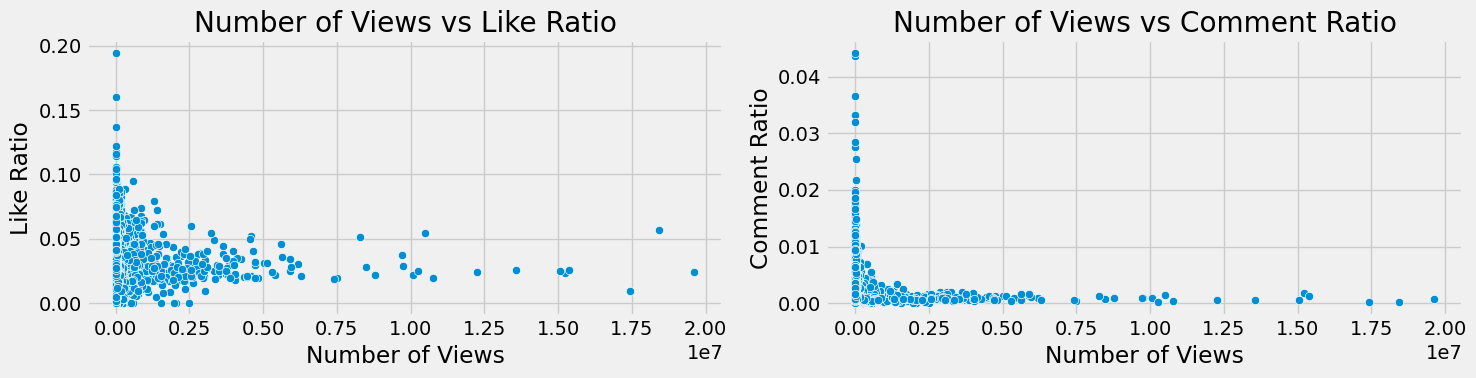

In [66]:
# Plot relationship between the number of views and like ratio and comment ratio in 2 scatter plots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes = axes.flatten()

sns.scatterplot(x='view_count', y='like_ratio', data=temp_df, ax=axes[0])
axes[0].set_title('Number of Views vs Like Ratio')
axes[0].set_xlabel('Number of Views')
axes[0].set_ylabel('Like Ratio')

sns.scatterplot(x='view_count', y='comment_ratio', data=temp_df, ax=axes[1])
axes[1].set_title('Number of Views vs Comment Ratio')
axes[1].set_xlabel('Number of Views')
axes[1].set_ylabel('Comment Ratio')

plt.tight_layout()
plt.show()

But top 5 videos with the highest are still very interesting. These are all short videos featuring tips and discussions about new technologies, making them highly engaging and easy to interact with.

## Video titles

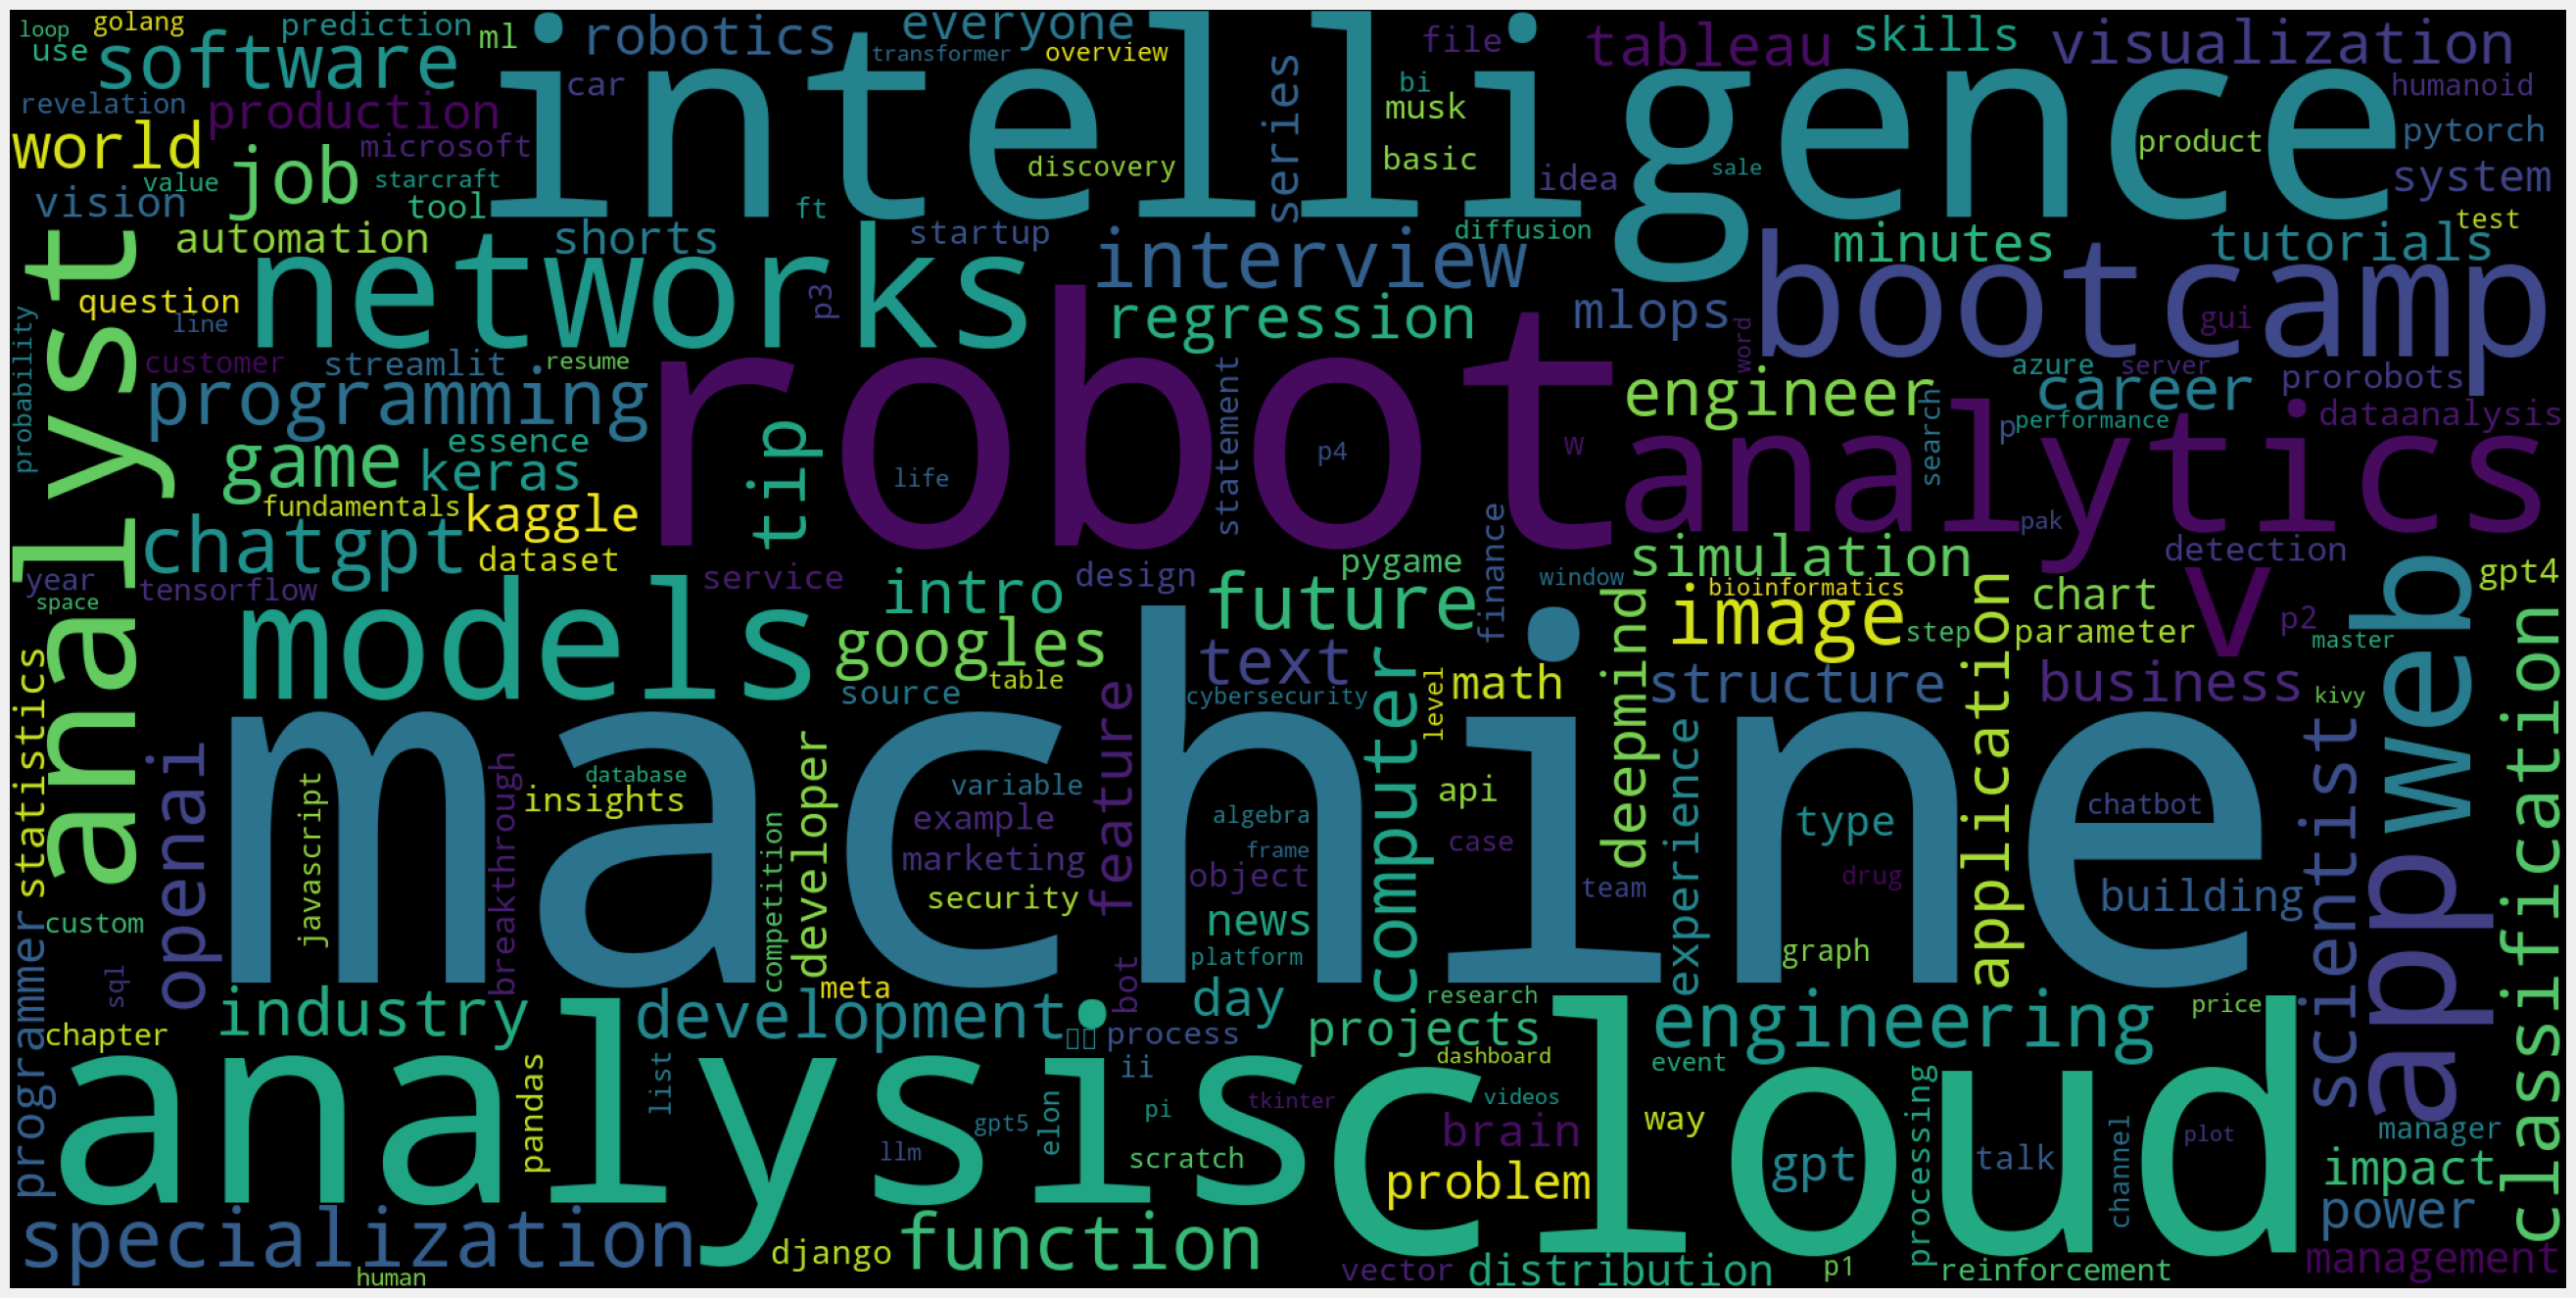

In [67]:
# stop words are words that are commonly used in a language and do not add any meaning to a sentence for example: the, a, an, in, etc.
def clean_title(title, channel_name):
    title = title.lower()
    channel_name = channel_name.lower()

    # Remove special characters and extra whitespaces
    title = re.sub(r'[^\w\s]', '', title)
    title = re.sub(r'\s+', ' ', title)

    # Remove any words that contain the channel name."
    channel_name = channel_name.split()
    title = [word for word in title.split() if word not in channel_name]
    # Only keep words that are nouns
    title = nltk.pos_tag(title)
    # NN: noun, singular
    # NNS: noun, plural
    # NNP: proper noun, singular
    # NNPS: proper noun, plural
    title = [word[0] for word in title if word[1] in ['NN', 'NNS', 'NNP', 'NNPS']]
    # Remove some common words to show more 
    common_words = ['tech', 'ai', 'data', 'technology', 'python', 'beginner', 'learn', 'lesson', 'tutorial', 'introduction', 'code', 'learning', 'part', 'science', 'beginners', 'course', 'courses', 'project', 'google', 'model', 'network', 'time', 'week', 'language', 'video', 'minute']
    title = [word for word in title if word not in common_words]
    return title
    

def plot_wordcloud_titles(df):
    df['title_clean'] = df.apply(lambda x: clean_title(x['title'], x['channelTitle']), axis=1)

    all_words = list([a for b in df['title_clean'].tolist() for a in b])
    all_words_str = ' '.join(all_words) 
    def plot_cloud(wordcloud):
        plt.figure(figsize=(30, 20))
        plt.imshow(wordcloud) 
        plt.axis("off");

    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                        colormap='viridis', collocations=False).generate(all_words_str)
    plot_cloud(wordcloud)

temp_df = videos_df.copy()
plot_wordcloud_titles(temp_df)

Despite removing some very common words in anticipation of new topics appearing, the word cloud still contains many familiar words. This is because we are analyzing videos in the field of data science, so the content of the videos is quite similar and revolves around common topics such as machine learning, analysis, deep learning, etc.

# Overview about all comments

## What are the most common times for commenting?

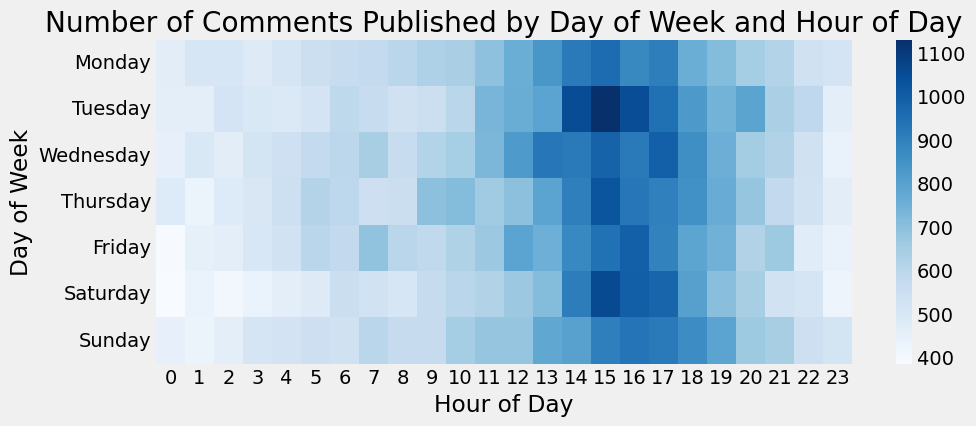

In [68]:
# Heatmap of the number of comment published by day of week and hour of day
temp_df = comments_df.copy()
temp_df['day_of_week'] = temp_df['published_at'].dt.strftime('%A')
temp_df['hour_of_day'] = temp_df['published_at'].dt.hour

# Sort the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp_df['day_of_week'] = pd.Categorical(temp_df['day_of_week'], categories=days_of_week, ordered=True)

plt.figure(figsize=(10, 4))
sns.heatmap(temp_df.groupby(['day_of_week', 'hour_of_day']).size().unstack(), cmap='Blues')
plt.title('Number of Comments Published by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

That's quite interesting. The graph shows that viewers are most likely to comment on videos during the afternoon, with 3 PM being the most popular time. This trend aligns with the time when creators typically publish their videos. From this observation, we can infer that individuals who comment on a video are likely to follow the channel and then promptly watch and comment on the video upon its release.

## Cloud word for sentiment analysis

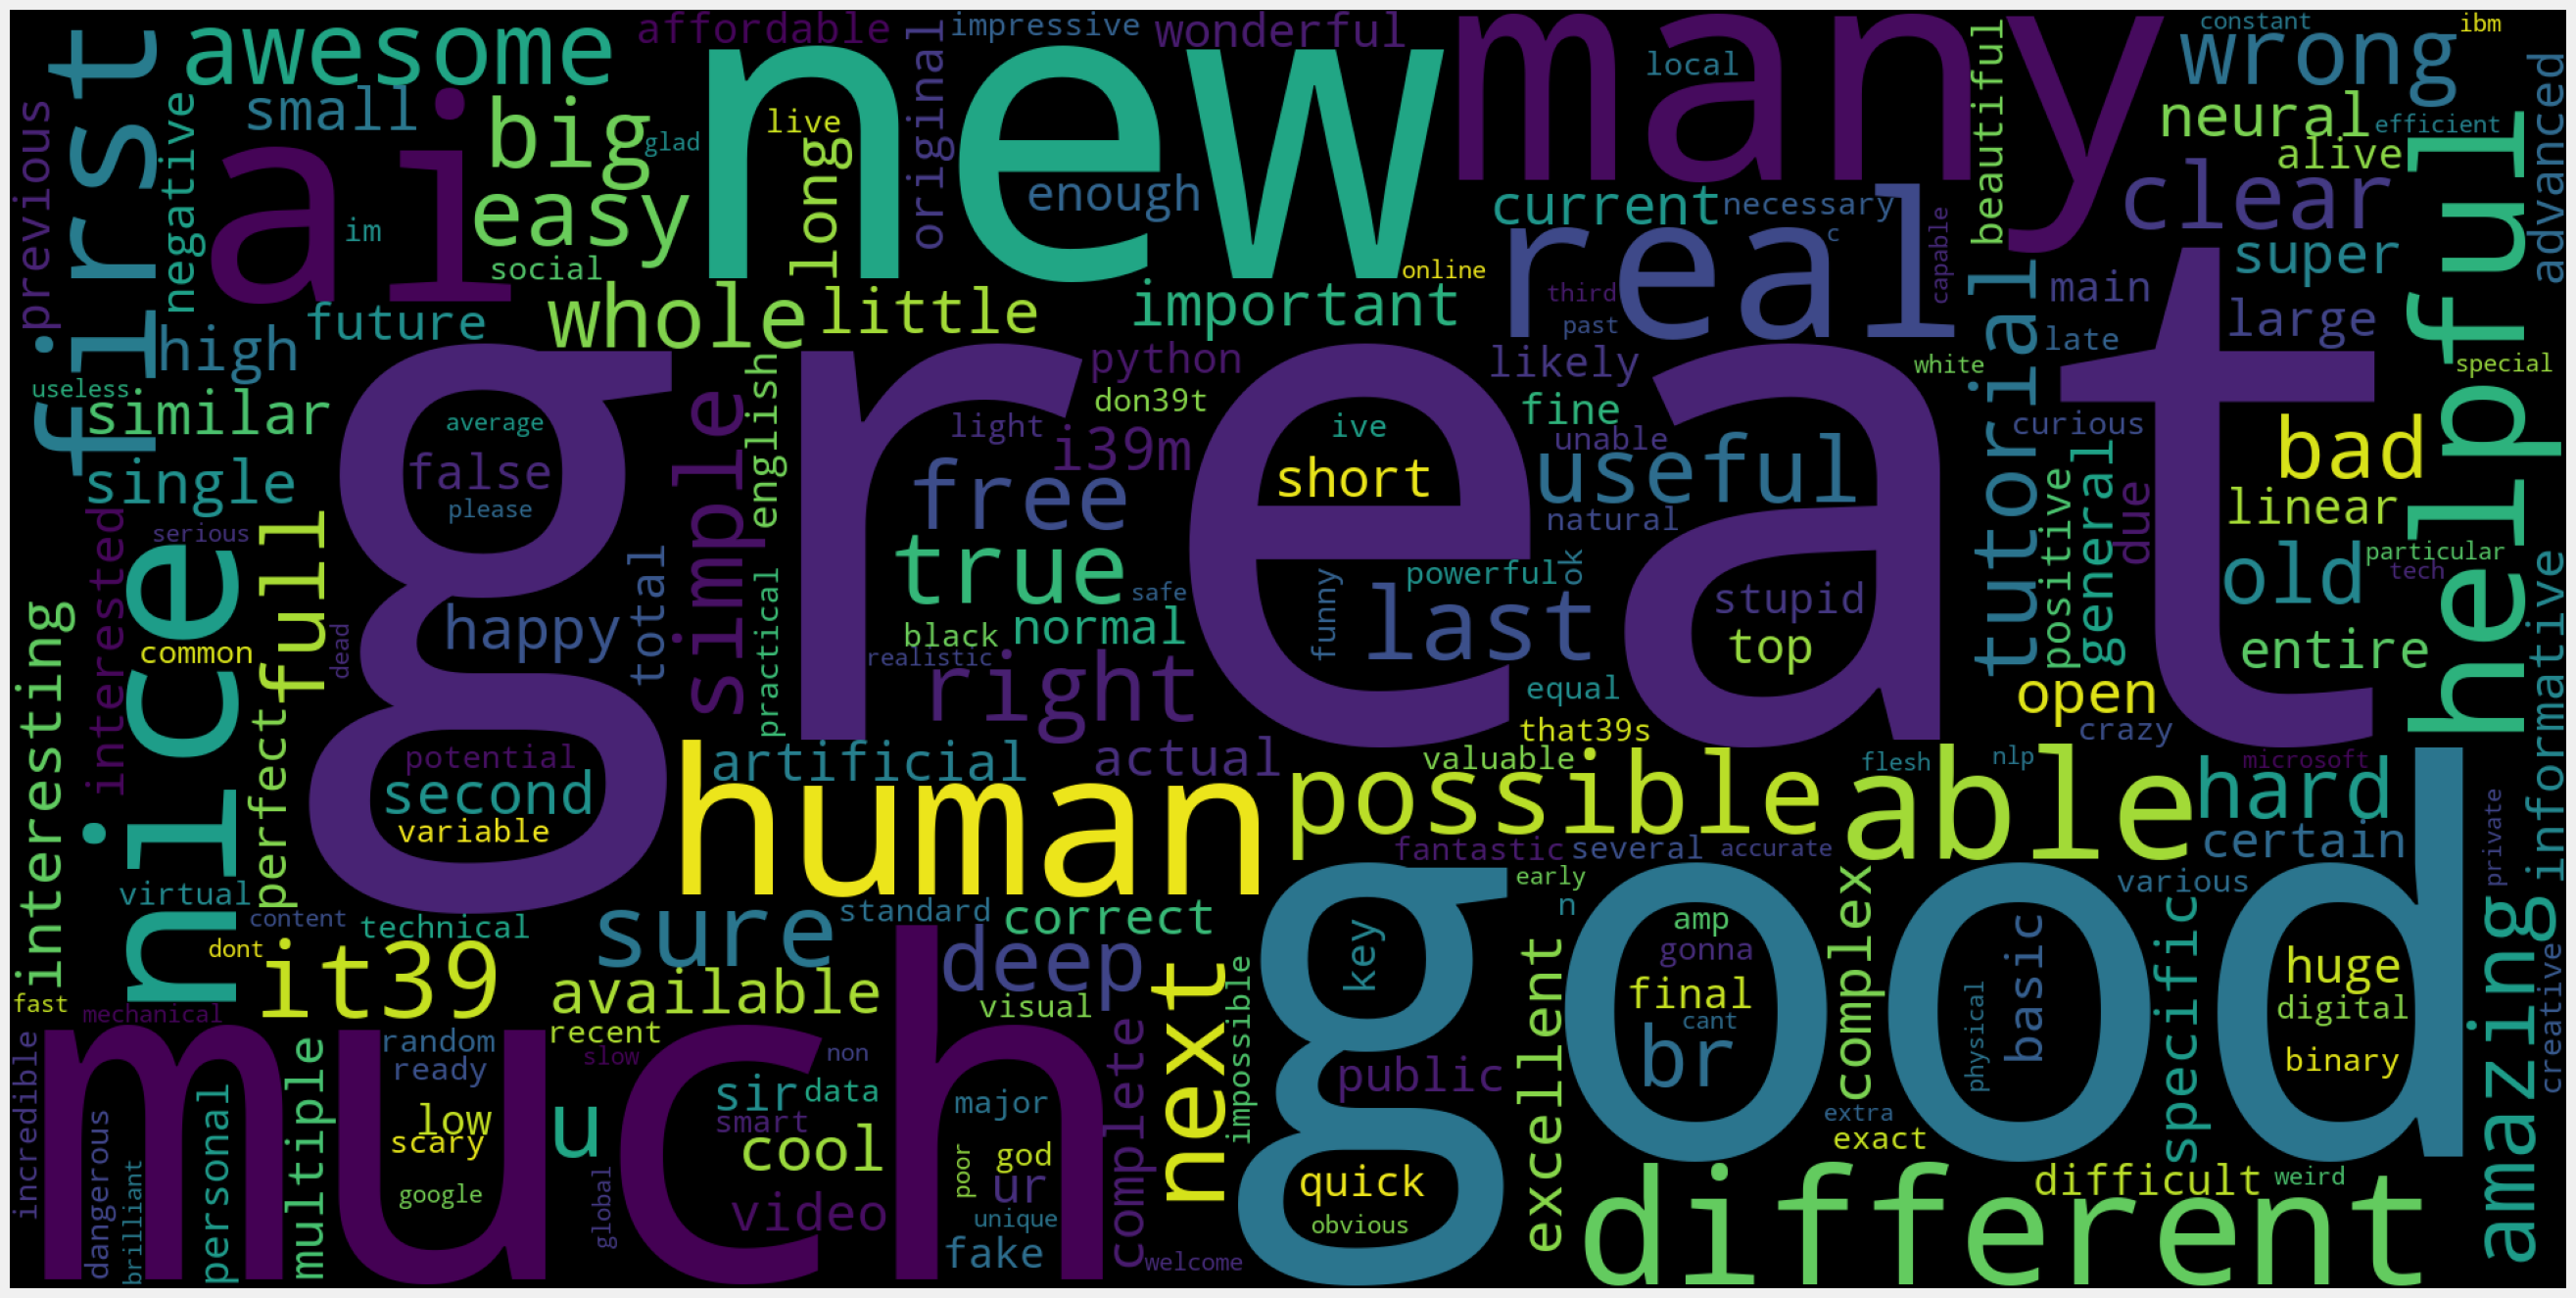

In [69]:
# stop words are words that are commonly used in a language and do not add any meaning to a sentence for example: the, a, an, in, etc.
temp_df = comments_df.copy()
def clean_comment(comment):
    comment = comment.lower()

    # Remove special characters and extra whitespaces
    comment = re.sub(r'[^\w\s]', '', comment)
    comment = re.sub(r'\s+', ' ', comment)

    # Only keep words that are adjectives
    comment = nltk.pos_tag(comment.split())
    # JJ: adjective or numeral, ordinal for example: first, second, third
    comment = [word[0] for word in comment if word[1] in ['JJ']]
    return comment
    


temp_df['adjective_words'] = temp_df.apply(lambda x: clean_comment(x['textdisplay']), axis=1)

all_words = list([a for b in temp_df['adjective_words'].tolist() for a in b])
all_words_str = ' '.join(all_words) 
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

Most of the comments are positive. Because we analyze videos in the field of education, viewers likely come to learn and gain new knowledge. So, they tend to leave positive comments to express their gratitude and appreciation. Besides, there are some negative comments like wrong, bad, etc. These comments aren't too weighty and offensive. The creators can use them to improve their videos.

## Sentiment Analysis

Using bertweet-base-sentiment-analysis - a pretrained model for sentiment analysis, we can classify the sentiment of each comment. The model has 3 classes: negative, neutral, and positive.

The time for sentiment analysis is quite long (~100 minutes). So, we will use the result of sentiment analysis that we have saved in the file `sentiment.csv`.

In [70]:
# sentiment_df = comments_df.copy()
# sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
# def get_sentiment(text):
#     # using emoji library to convert emoji into text
#     # Keep only the first 100 characters since the maximum sequence length for this model is 128
#     text = emoji.demojize(text)[:100]
#     result = sentiment_pipeline(text)
#     return result[0]['label']


# sentiment_df['sentiment'] = sentiment_df['textdisplay'].apply(lambda x: get_sentiment(x))

sentiment_df = pd.read_csv('../data/processed/comments_sentiment.csv', lineterminator='\n')

In [71]:
sentiment_df = pd.read_csv('../data/processed/comments_sentiment.csv', lineterminator='\n')

In [72]:
sentiment_df['sentiment'].value_counts()

NEU    52656
POS    39701
NEG    18052
Name: sentiment, dtype: int64

Take a look at the result

In [73]:
sentiment_df.loc[sentiment_df['sentiment'] == 'NEG', ['textdisplay', 'sentiment']].head(3)

textdisplay  \
21  sorry to say they are not as good as Andrews Machine Learning and Deep Learning courses. People ...   
22                                         Yes, the course is not good enough by senior data scientist.   
38                                   I&#39;m confused about whether I should be taking ML&amp;AI or CSE   

   sentiment  
21       NEG  
22       NEG  
38       NEG

In [74]:
sentiment_df.loc[sentiment_df['sentiment'] == 'POS', ['textdisplay', 'sentiment']].head(3)

textdisplay  \
0  Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for free these courses as I belong from India but don&#...   
1                                                                                            Best One🎉   
3                                                                                            Superb 🎉❤   

  sentiment  
0       POS  
1       POS  
3       POS

In [75]:
sentiment_df.loc[sentiment_df['sentiment'] == 'NEU', ['textdisplay', 'sentiment']].head(3)

textdisplay  \
2  Hi, I&#39;m a clinician who is working in the digital health/ informatics space. Can you please ...   
5                                                                                            💖👆💖🎓🎓🎓👉👆👈   
6                                Is there an AI for evil Course? I am asking of course for a friend😅!🈲   

  sentiment  
2       NEU  
5       NEU  
6       NEU

In [76]:
count_sentiment = sentiment_df.groupby(['video_id', 'sentiment']).size().unstack()
count_sentiment = count_sentiment.merge(videos_df[['video_id', 'title', 'channelTitle']], on='video_id')
count_sentiment.head()

video_id   NEG   NEU   POS  \
0  --ZXFpt2S1E  15.0  52.0  33.0   
1  -0NwrcZOKhQ  11.0  48.0  41.0   
2  -1j0_SVaAJM   5.0  34.0  11.0   
3  -6Xn4nKm-Qw  16.0  50.0  34.0   
4  -7sy16dy14Q   NaN   NaN   1.0   

                                                                                     title  \
0                                     Crushing 1,000,000 Particles With a Hydraulic Press!   
1                                      Python Pandas Tutorial 4: Read Write Excel CSV File   
2  Python books for beginners? What Python projects to work on? | 2 Python Beginner FAQ’s!   
3                                     OpenAI’s Image GPT Completes Your Images With Style!   
4                                          AI + Brain to Brain Interface (BBI) | Tech News   

        channelTitle  
0  Two Minute Papers  
1         codebasics  
2            CS Dojo  
3  Two Minute Papers  
4            AI News

### Videos with the most positive comments

In [77]:
top_pos = count_sentiment.sort_values(by='POS', ascending=False)
top_pos.head()

video_id  NEG   NEU   POS  \
715   ER2It2mIagI  1.0  17.0  82.0   
1423  UnVyNh6P6FQ  1.0  17.0  82.0   
2874  zfiSAzpy9NM  8.0  16.0  76.0   
1455  VhRtaziEWd4  2.0  22.0  76.0   
1806  cdDD5t9r98c  5.0  20.0  75.0   

                                                                                                    title  \
715            Neural Network Simply Explained | Deep Learning Tutorial 4 (Tensorflow2.0, Keras & Python)   
1423                                                                               The END of the Journey   
2874  Simple explanation of convolutional neural network | Deep Learning Tutorial 23 (Tensorflow & Pyt...   
1455                   What is a neuron? | Deep Learning Tutorial 3 (Tensorflow Tutorial, Keras & Python)   
1806                                         How my health struggle inspired me to start YouTube Channel?   

     channelTitle  
715    codebasics  
1423   codebasics  
2874   codebasics  
1455   codebasics  
1806   codebasics

That's quite surprising. The top 5 videos with the most positive comments all belong to 'codebasics,' a channel dedicated to teaching programming languages. Upon reviewing the comments, it becomes evident that a significant portion expresses gratitude and appreciation for the creator's teaching style. The creator typically receives comments such as "simple and intuitive," "Thank you," and "Awesome explainer", among others. This channel could be an excellent choice for anyone looking to begin learning programming languages, especially in the field of data science.

### Videos with the most negative comments

In [78]:
top_neg = count_sentiment.sort_values(by='NEG', ascending=False)
top_neg.head()

video_id   NEG   NEU   POS  \
426   89yPjWjss7Y  61.0  23.0  16.0   
2665  ucp49z5pQ2s  52.0  36.0  12.0   
2480  r5JvhWpNbqM  51.0  42.0   7.0   
1531  XTzOxMq-Qk0  50.0  36.0  14.0   
1497  Wf-s9C9uf7U  49.0  34.0  17.0   

                                                                                          title  \
426   AI Drone Kills Operator, GPT 4.2 Leaks,Bard Gets SUPERCHARGED, And Much More [AI NEWS #5]   
2665                          Open AI CEO STUNS Everyone With Statements On GPT 5(GPT-5 Update)   
2480                MICROSOFTS New AGI JARVIS  SHOCKS The Entire Industry! (FINALLY ANNOUNCED!)   
1531             Open AI Team STUNS Everyone With NEW Statement On Artificial Superintelligence   
1497     6 Minutes Ago: Godfather Of AI Shared Terrifying Message About Artificial Intelligence   

     channelTitle  
426     TheAiGrid  
2665    TheAiGrid  
2480    TheAiGrid  
1531    TheAiGrid  
1497    TheAiGrid

As observed in [this cell](#another_cell), TheAiGrid has a notably high number of comments. However, the top 5 videos with the most negative comments all belong to this channel, which is quite surprising. This could be attributed to the channel's tendency to choose controversial topics for discussion, eliciting a range of opinions and comments. Interestingly, controversial topics are inherently captivating to viewers, and while they might not be as popular in the field of data science, they can serve as an advantage for this channel.